In [23]:
import pandas as pd 
df = pd.read_csv("adult.data", header = None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
              'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
              'hours-per-week','native_country', 'income']

In [24]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# SMART 
# Use demographic information to predict whether or not income level exceeds 50K for individuals in the dataset 

In [26]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

In [77]:
% matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt 
print df.income.value_counts()
df_income_ind = pd.get_dummies(df['income'])
df_new = pd.concat([df, df_income_ind], axis=1)
df_new

equiv = {"<=50K":0, ">50K":1}
df["income_new"] = df["income"].map(equiv)


 <=50K    24720
 >50K      7841
Name: income, dtype: int64


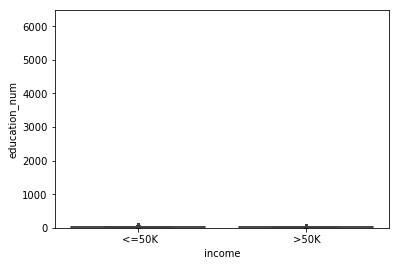

In [55]:
plt.hist(df.age)
sns.boxplot(x = "income", y = "education_num", data = df)
import statsmodels.formula.api as smf 

In [86]:
income_table = pd.crosstab(index = df.income, columns = "count")
sex_table = pd.crosstab(index = df.sex, columns = "count")

In [88]:
print "income_table"
print income_table
print "sex_table"
print sex_table

income_table
col_0   count
income       
 <=50K  24720
 >50K    7841
sex_table
col_0    count
sex           
 Female  10771
 Male    21790


In [89]:
observed = income_table

sex_ratios = sex_table/len(sex_table)  # Get population ratios

expected = sex_ratios * len(income_table)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print chi_squared_stat

col_0
count    0.0
dtype: float64
